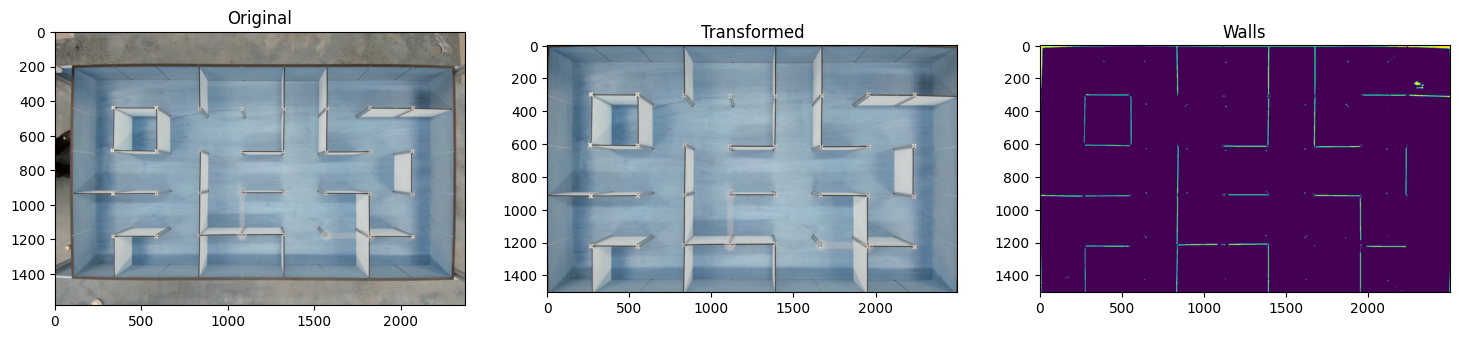

In [58]:
import cv2 # OpenCV library
import numpy as np # Numpy library for scientific computing
import matplotlib.pyplot as plt # Matplotlib library for plotting


img_bgr = cv2.imread('../../test/camera_image5.jpg')
pts1 = np.float32([[100,200],[2300,200],[100,1450],[2300,1450]]) 
pts2 = np.float32([[0,0],[2500,0],[0,1550],[2500,1550]]) 
H = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img_bgr, H, (2500,1500))

hsv = cv2.cvtColor(dst, cv2.COLOR_BGR2HSV)
lower_blue = np.array([0,0,0])
upper_blue = np.array([180,255,100])
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
result_blue = cv2.bitwise_and(dst,dst, mask= mask_blue)

alpha = 10 # Contrast control
beta = 200 # Brightness control

# call convertScaleAbs function
adjusted = cv2.convertScaleAbs(mask_blue, alpha=alpha, beta=beta)



fig, (ax1, ax2, ax3) = plt.subplots(figsize = (18, 10), ncols = 3)
ax1.imshow(img_bgr), ax1.set_title("Original")
ax2.imshow(dst), ax2.set_title("Transformed")
ax3.imshow(adjusted), ax3.set_title("Walls")
# for i in range(0,2000):
#     print(adjusted[800,i])

plt.show()


In [1]:
import cv2 # OpenCV library
import numpy as np # Numpy library for scientific computing
import matplotlib.pyplot as plt # Matplotlib library for plotting
# each section is 250 x 300 pixels 
SECTION_WIDTH = 55
SECTION_HEIGHT = 66
WALL_RATIO = 0.2

h_wall = "---"
v_wall = "|"
h_start_pixel = 0
h_end_pixel = SECTION_WIDTH
v_start_pixel = 0
v_end_pixel = SECTION_HEIGHT
h_section_pixel = SECTION_WIDTH
v_section_pixel = SECTION_HEIGHT



cap = cv2.VideoCapture(0)
ret, frame = cap.read()



maze_list = [[' ','-','-','-',' ','-','-','-',' ','-','-','-',' ','-','-','-',' ','-','-','-',' ','-','-','-',' ','-','-','-',' ','-','-','-',' ','-','-','-',' '],
             ['|',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ','|'],
             [' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' '],
             ['|',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ','|'],
             [' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' '],
             ['|',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ','|'],
             [' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' '],
             ['|',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ','|'],
             [' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' '],
             ['|',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ','|'],
             [' ','-','-','-',' ','-','-','-',' ','-','-','-',' ','-','-','-',' ','-','-','-',' ','-','-','-',' ','-','-','-',' ','-','-','-',' ','-','-','-',' ']]




img_bgr = frame #cv2.imread('../../test/Screenshot_5.png')
cap.release()
hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)



for row in range(0,5):
    for col in range(0,8):
        h_section_pixel = SECTION_WIDTH*col + SECTION_WIDTH
        h_start_section = h_section_pixel - 5
        h_end_section = h_section_pixel + 5
        wall_count = 0
        no_wall_count = 0
        for v in range(h_start_section,h_end_section):
            for h in range(v_start_pixel,v_end_pixel):
                px_hsv_value = hsv[h,v]
                if (px_hsv_value[2] > 90):
                    wall_count+=1
                else:
                    no_wall_count+=1

        if (wall_count/no_wall_count > WALL_RATIO):
            #print("YES WALL")
            maze_list[2*row+1][4*col+4] = '|'
            #print(row_list[4*col+4])
            image = cv2.rectangle(img_bgr, (h_start_section,v_start_pixel), (h_end_section,v_end_pixel), (255,0,0), 1)

    v_start_pixel = v_end_pixel
    v_end_pixel+=SECTION_HEIGHT

for col in range(0,9):
    for row in range(0,4):
        v_section_pixel = SECTION_HEIGHT*row + SECTION_HEIGHT
        v_start_section = v_section_pixel - 5
        v_end_section = v_section_pixel + 5
        wall_count = 0
        no_wall_count = 0
        for v in range(v_start_section,v_end_section):
            for h in range(h_start_pixel,h_end_pixel):
                #print(h,v)
                px_hsv_value = hsv[v,h]
                if (px_hsv_value[2] > 90):
                    wall_count+=1
                else:
                    no_wall_count+=1
        if (wall_count/no_wall_count > WALL_RATIO):
            #print("YES WALL")
            maze_list[2*row+2][4*col+1] = '-'
            maze_list[2*row+2][4*col+2] = '-'
            maze_list[2*row+2][4*col+3] = '-'
            image = cv2.rectangle(img_bgr, (h_start_pixel,v_start_section), (h_end_pixel, v_end_section), (255,0,0), 1)

    h_start_pixel = h_end_pixel
    h_end_pixel+=SECTION_WIDTH



for x in maze_list:
    print("".join(x))
plt.imshow(img_bgr)
plt.show()





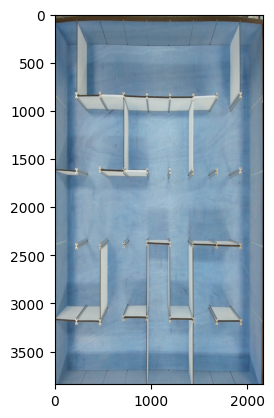

(2160, 3840, 3)


In [25]:
import cv2 # OpenCV library
import numpy as np # Numpy library for scientific computing
import matplotlib.pyplot as plt # Matplotlib library for plotting




img_bgr = cv2.imread('maze_pic.jpg')
pts1 = np.float32([[450,250],[3450,250],[450,1900],[3450,1900]]) 
pts2 = np.float32([[0,0],[2160,0],[0,3840],[2160,3840]]) 
H = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img_bgr, H, (2160,3840))
plt.imshow(dst)
plt.show()
print(img_bgr.shape)



In [4]:
import cv2 # OpenCV library
import numpy as np # Numpy library for scientific computing
import matplotlib.pyplot as plt # Matplotlib library for plotting
# each section is 250 x 300 pixels 
SECTION_WIDTH = 277
SECTION_HEIGHT = 300
WALL_RATIO = 0.055

h_start_pixel = 0
h_end_pixel = SECTION_WIDTH
v_start_pixel = 0
v_end_pixel = SECTION_HEIGHT
h_section_pixel = SECTION_WIDTH
v_section_pixel = SECTION_HEIGHT



 


maze_list = [[' ','-','-','-',' ','-','-','-',' ','-','-','-',' ','-','-','-',' ','-','-','-',' ','-','-','-',' ','-','-','-',' ','-','-','-',' ','-','-','-',' '],
             ['|',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ','|'],
             [' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' '],
             ['|',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ','|'],
             [' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' '],
             ['|',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ','|'],
             [' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' '],
             ['|',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ','|'],
             [' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' '],
             ['|',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ','|'],
             [' ','-','-','-',' ','-','-','-',' ','-','-','-',' ','-','-','-',' ','-','-','-',' ','-','-','-',' ','-','-','-',' ','-','-','-',' ','-','-','-',' ']]




img_bgr = cv2.imread('maze_pic.jpg')

pts1 = np.float32([[100,200],[2300,200],[100,1450],[2300,1450]]) 
pts2 = np.float32([[0,0],[2500,0],[0,1550],[2500,1550]]) 
H = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img_bgr, H, (2500,1500))

hsv = cv2.cvtColor(dst, cv2.COLOR_BGR2HSV)
lower_blue = np.array([0,0,0])
upper_blue = np.array([180,255,100])
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
result_blue = cv2.bitwise_and(dst,dst, mask= mask_blue)

alpha = 10 # Contrast control
beta = 200 # Brightness control

# call convertScaleAbs function
adjusted = mask_blue #cv2.convertScaleAbs(mask_blue, alpha=alpha, beta=beta)


v_error_counter = 0.0
for row in range(0,5):
    for col in range(0,8):
        if (v_error_counter > 1):
            v_error_counter-=1
        h_section_pixel = int(SECTION_WIDTH*col + SECTION_WIDTH + col*v_error_counter)
        v_error_counter+=0.78
        h_start_section = h_section_pixel - 15
        h_end_section = h_section_pixel + 15
        wall_count = 0
        no_wall_count = 0
        for v in range(h_start_section,h_end_section):
            for h in range(v_start_pixel,v_end_pixel):
                px_hsv_value = adjusted[h,v]
                if (px_hsv_value > 220):
                    wall_count+=1
                else:
                    no_wall_count+=1
        if (wall_count/no_wall_count > WALL_RATIO):
            #print("YES WALL")
            maze_list[2*row+1][4*col+4] = '|'
            #print(row_list[4*col+4])
            image = cv2.rectangle(dst, (h_start_section,v_start_pixel), (h_end_section,v_end_pixel), (255,0,0), 5)

    v_start_pixel = v_end_pixel
    v_end_pixel+=SECTION_HEIGHT


for col in range(0,9):
    for row in range(0,4):
        v_section_pixel = (SECTION_HEIGHT+5)*row + SECTION_HEIGHT+5
        v_start_section = v_section_pixel - 15
        v_end_section = v_section_pixel + 15
        wall_count = 0
        no_wall_count = 0
        for v in range(v_start_section,v_end_section):
            for h in range(h_start_pixel,h_end_pixel):
                #print(h,v)
                px_hsv_value = adjusted[v,h]
                if (px_hsv_value > 220):
                    wall_count+=1
                else:
                    no_wall_count+=1
        if (wall_count/no_wall_count > WALL_RATIO):
            #print("YES WALL")
            maze_list[2*row+2][4*col+1] = '-'
            maze_list[2*row+2][4*col+2] = '-'
            maze_list[2*row+2][4*col+3] = '-'
            image = cv2.rectangle(dst, (h_start_pixel,v_start_section), (h_end_pixel, v_end_section), (255,0,0), 3)

    h_start_pixel = h_end_pixel
    h_end_pixel+=SECTION_WIDTH



for x in maze_list:
    print("".join(x))
plt.imshow(adjusted)
plt.imshow(dst)
plt.show()
print(adjusted.shape)

ZeroDivisionError: division by zero